In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


MSE score: 0.03106211038737373
R2 score: 0.6762928725514189
MSE score: 0.031062180923466486
R2 score: 0.6762921374746427
MSE score: 0.031062889238321248
R2 score: 0.6762847559231606
MSE score: 0.031070267038064134
R2 score: 0.6762078697640466
MSE score: 0.025964280940135368
R2 score: 0.7294188097787587
MSE score: 0.025964357569500888
R2 score: 0.729418011202246
MSE score: 0.025965134934895558
R2 score: 0.7294099100553584
MSE score: 0.02597400333379098
R2 score: 0.7293174899365802
MSE score: 0.015515263678741075
R2 score: 0.8383110041649292
MSE score: 0.015515827926070877
R2 score: 0.838305123982288
MSE score: 0.015521503325611929
R2 score: 0.8382459790220891
MSE score: 0.015581477261043787
R2 score: 0.8376209735051321
MSE score: 0.01327136009744349
R2 score: 0.8616953645163329
MSE score: 0.013271551751774836
R2 score: 0.8616933672317862
MSE score: 0.013273512834784371
R2 score: 0.861672930225421
MSE score: 0.013297453541941872
R2 score: 0.8614234372757664
MSE score: 0.01032235355593613

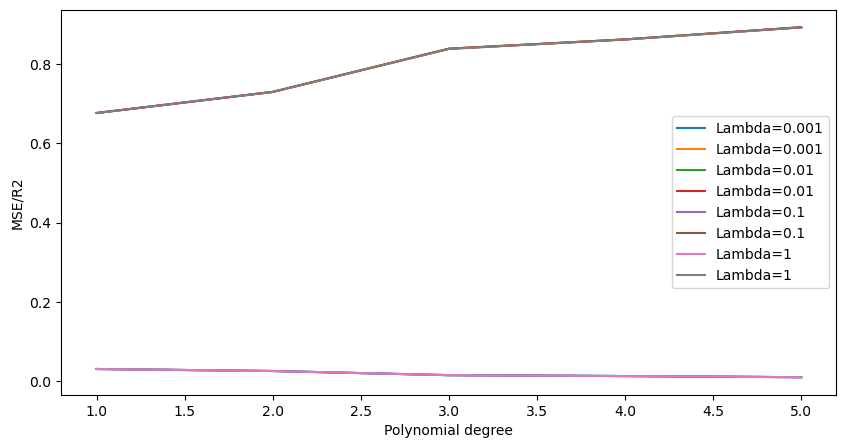

In [14]:
# Franke function
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

# Generate data
np.random.seed(42)
n = 1000
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
noise = 0.1*np.random.normal(0, 1, n)
Z = FrankeFunction(x, y) + noise

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(x.reshape(-1,1))
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))

x_combined = np.hstack((x_scaled, y_scaled))

# Split the data into training and test data
x_train, x_test, z_train, z_test = train_test_split(x_combined, Z, test_size=0.2)

lambda_values = [0.001, 0.01, 0.1, 1]
r2_values = {lmb: [] for lmb in lambda_values}
mse_values = {lmb: [] for lmb in lambda_values}
degrees = range(1,6)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    for lmb in lambda_values:
      beta_ridge = np.linalg.inv(x_train_poly.T @ x_train_poly + lmb*np.eye(x_train_poly.shape[1])) @ x_train_poly.T @ z_train
      y_pred_ridge = x_test_poly @ beta_ridge
      mse = mean_squared_error(z_test, y_pred_ridge)
      r2 = r2_score(z_test, y_pred_ridge)
      mse_values[lmb].append(mse)
      r2_values[lmb].append(r2)

      print(f"MSE score: {mse}")
      print(f"R2 score: {r2}")


plt.figure(figsize=(10,5))
for lmb in lambda_values:
    plt.plot(degrees, mse_values[lmb], label=f"Lambda={lmb}")
    plt.plot(degrees, r2_values[lmb], label=f"Lambda={lmb}")

plt.xlabel("Polynomial degree")
plt.ylabel("Score")
plt.legend()
plt.show()
